In [25]:
# import packages we need for exploratory data analysis (EDA)
import pandas as pd  # to store tabular data
import numpy as np  # to do some math
import matplotlib.pyplot as plt  # a popular data visualization tool
import seaborn as sns  # another popular data visualization tool
%matplotlib inline  
plt.style.use('fivethirtyeight')  # a popular data visualization theme

# SFO Customer Survey Dataset

In [26]:
# load in the data set
customer = pd.read_csv('../data/2013_SFO_Customer_survey.csv')

In [27]:
# view the first few rows and the headers
customer.head()

,RESPNUM,CCGID,RUN,INTDATE,GATE,STRATA,PEAK,METHOD,AIRLINE,FLIGHT,...,Q17_COUNTRY,HOME,Q18_AGE,Q19_SEX,Q20_INCOME,Q21_HIFLYER,Q22A_USESJC,Q22B_USEOAK,LANG,WEIGHT
0,1,1,1215,2,12,1,1,1,21,1437,...,US,1,2,1,1,2,2,1,1,0.553675
1,2,2,1215,2,12,1,1,1,21,1437,...,US,5,6,1,0,3,2,1,1,0.553675
2,3,3,1215,2,12,1,1,1,21,1437,...,US,1,4,2,2,3,2,2,1,0.553675
3,4,4,1215,2,12,1,1,1,21,1437,...,US,90,4,1,2,2,2,2,1,0.553675
4,5,5,1215,2,12,1,1,1,21,1437,...,US,10,3,1,3,1,0,1,1,0.553675


In [28]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [29]:
customer.shape

(3535, 95)

In [30]:
art_ratings = customer['Q7A_ART']

In [31]:
art_ratings.describe()  # it considers the ratings numerical, so let's cast them as a string because we know that they are ordinal

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [32]:
# only consider ratings 1-5
art_ratings = art_ratings[(art_ratings >=1) & (art_ratings <=5)]

In [33]:
# cast the values as strings
art_ratings = art_ratings.astype(str)

In [34]:
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

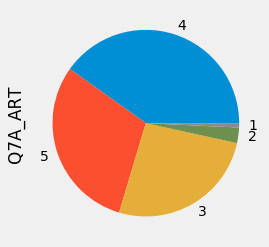

In [35]:
# Can use pie charts, just like in nominal level
art_ratings.value_counts().plot(kind='pie')

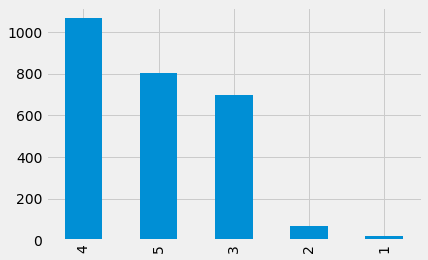

In [36]:
# Can use bar charts, just like in nominal level
art_ratings.value_counts().plot(kind='bar')

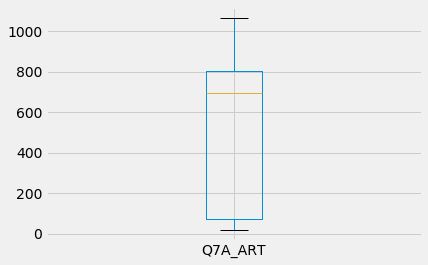

In [37]:
# Boxplots are available at the ordinal level
art_ratings.value_counts().plot(kind='box')

> 箱形图（Box-plot），是一种用作显示一组数据分散情况资料的统计图.
> 它能显示出一组数据的最大值、最小值、中位数、及上下四分位数。

In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [14]:
customer.isnull().sum()

RESPNUM        0
CCGID          0
RUN            0
INTDATE        0
GATE           0
              ..
Q21_HIFLYER    0
Q22A_USESJC    0
Q22B_USEOAK    0
LANG           0
WEIGHT         0
Length: 95, dtype: int64

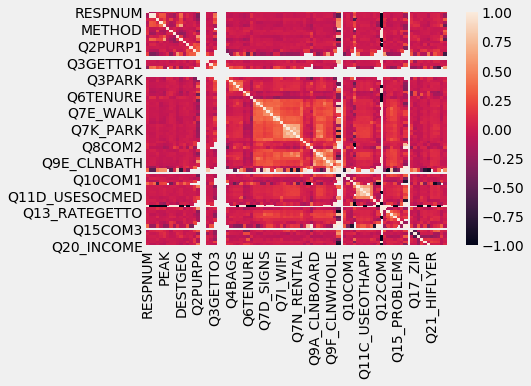

In [15]:
sns.heatmap(customer.corr())

In [16]:
# we see that there are quite a few null values, so let's discuss methods for handling missing data
# other methods to handle missing data, (called imputing): 
# using the mean of the column for the missing values,
# utilizing machine learning methods to fill in the data

In [17]:
# here we will remove the columns that contain those missing values for now
customer.dropna(axis=1, inplace=True)

In [18]:
customer.isnull().sum()

RESPNUM        0
CCGID          0
RUN            0
INTDATE        0
GATE           0
              ..
Q21_HIFLYER    0
Q22A_USESJC    0
Q22B_USEOAK    0
LANG           0
WEIGHT         0
Length: 66, dtype: int64

In [19]:
# Columns with null values got dropped (went from 95 columns to 66)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 66 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q3GETTO1           3535 non-null int64
Q4BAGS             3535 non-null int64
Q4BUY              3535 non-null int64
Q4FOOD             3535 non-null int64
Q4WIFI             3535 non-null int64
Q5FLYPERYR         3535 non-null int64
Q6TENURE           3535 non-null

In [20]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
RESPNUM,3535.0,2119.889392,1385.474407,1.000000,886.500000,2137.000000,3168.500000,9995.000000
RUN,3535.0,1960.375389,458.893056,1201.000000,1605.500000,1918.000000,2403.000000,2806.000000
INTDATE,3535.0,9.431966,4.561762,2.000000,6.000000,9.000000,14.000000,18.000000
GATE,3535.0,52.635078,34.075357,1.000000,21.000000,52.000000,87.000000,102.000000
STRATA,3535.0,1.977652,0.778393,1.000000,1.000000,2.000000,3.000000,3.000000
...,...,...,...,...,...,...,...,...
Q21_HIFLYER,3535.0,1.837058,0.596193,0.000000,2.000000,2.000000,2.000000,4.000000
Q22A_USESJC,3535.0,1.718812,0.584292,0.000000,2.000000,2.000000,2.000000,4.000000
Q22B_USEOAK,3535.0,1.663932,0.612257,0.000000,1.000000,2.000000,2.000000,4.000000
LANG,3535.0,1.159264,0.628356,1.000000,1.000000,1.000000,1.000000,4.000000


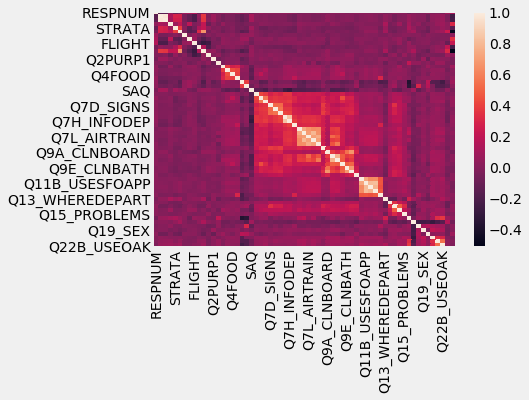

In [21]:
sns.heatmap(customer.corr())